In [86]:
#now that I've looked at the data in EDA file, wanted to look at how the frequency changes a bit more over time
#how change in a month
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import os
import pixiedust as pix


In [2]:
os.listdir("/home/cdsw/01_future-sales/data")

['test.csv',
 'sales_train_v2.csv',
 'sample_submission.csv',
 'shops.csv',
 'items.csv',
 'item_categories.csv']

In [3]:
dateCols = ['date']
train2=pd.read_csv("/home/cdsw/train_plus_not_imputted.csv",parse_dates=dateCols)
#weird that this is crazy quick to load vs the original? is it compressed?

In [4]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 9 columns):
Unnamed: 0          int64
date                datetime64[ns]
date_block_num      int64
shop_id             int64
item_id             int64
item_price          float64
item_cnt_day        float64
item_name           object
item_category_id    int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 201.6+ MB


In [5]:
len(set(train2.date))

1034

In [6]:
train2.date.max()
#so apparently I haven't trimmed the data - works out as am predicting the November and have the start to see how it leads in

Timestamp('2015-12-10 00:00:00')

In [7]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 9 columns):
Unnamed: 0          int64
date                datetime64[ns]
date_block_num      int64
shop_id             int64
item_id             int64
item_price          float64
item_cnt_day        float64
item_name           object
item_category_id    int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 201.6+ MB


In [8]:
#create a month variable and then see how many months are at 1 or zero
train2["Month"]=train2.date.dt.month
train2["Year"]=train2.date.dt.year
train2['YM'] = train2['Year']*100+train2["Month"]
train2.head()



,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,Month,Year,YM
0,0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,2,2013,201302
1,1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,3,2013,201303
2,2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,5,2013,201305
3,3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,6,2013,201306
4,4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,1,2013,201301


In [9]:
#create a month variable and then see how many months are at 1 or zero
train2["Month"]=train2.date.dt.month
train2["Year"]=train2.date.dt.year
train2["YM"]=train2.Year*100+train2.Month




In [10]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 12 columns):
Unnamed: 0          int64
date                datetime64[ns]
date_block_num      int64
shop_id             int64
item_id             int64
item_price          float64
item_cnt_day        float64
item_name           object
item_category_id    int64
Month               int64
Year                int64
YM                  int64
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 268.8+ MB


In [11]:
train2.head()

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,Month,Year,YM
0,0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,2,2013,201302
1,1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,3,2013,201303
2,2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,5,2013,201305
3,3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,6,2013,201306
4,4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,1,2013,201301


In [12]:
#group by sales per month
sales_per_item_PM= train2.groupby(['item_id','YM'])['item_cnt_day'].sum().reset_index()

print(sales_per_item_PM.info())
sales_per_item_PM.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286604 entries, 0 to 286603
Data columns (total 3 columns):
item_id         286604 non-null int64
YM              286604 non-null int64
item_cnt_day    286604 non-null float64
dtypes: float64(1), int64(2)
memory usage: 6.6 MB
None


,item_id,YM,item_cnt_day
0,0,201401,1.0
1,1,201402,1.0
2,1,201404,2.0
3,1,201406,1.0
4,1,201410,1.0


In [13]:
#questions to answer now
    #how many of these have sales in every month
        #count of count of this table per id being 34
        # vs a unique number of products

    #Should I restrict this to the bigger items - how many sold over all?    
    #what is the development of the sales shape
        

In [14]:
#Question1
#how many of these have sales in every month
        #count of count of this table per id being 34
        # vs a unique number of products
num_months=sales_per_item_PM.groupby(["item_id"]).count()
num_months["item_id"]=num_months.index
#print(num_months.info())
num_months.head()

,YM,item_cnt_day,item_id
item_id,,,
0,1,1,0
1,5,5,1
2,2,2,2
3,2,2,3
4,1,1,4


In [15]:
all_months=num_months[num_months.YM>30]
all_months.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654 entries, 30 to 22167
Data columns (total 3 columns):
YM              1654 non-null int64
item_cnt_day    1654 non-null int64
item_id         1654 non-null int64
dtypes: int64(3)
memory usage: 51.7 KB


In [16]:
#so only 1654 items which were presented in 31 or more months of the 22k products
#what are the volumes of these items - are they all a certain category type

#overall sales per item
sales_per_item=train2.groupby(["item_id"])["item_cnt_day"].sum().reset_index()
sales_per_item["perweek"]=sales_per_item.item_cnt_day/150


print("Number of items sold less than 1-10 times a week:", len(sales_per_item[(sales_per_item.perweek<10) & (sales_per_item.perweek>=5) ]))
print("Number of items sold less than 11-50 times a week:", len(sales_per_item[(sales_per_item.perweek<50) & (sales_per_item.perweek>=10) ]))
print("Number of items sold less than 51-500 times a week:", len(sales_per_item[(sales_per_item.perweek<500) & (sales_per_item.perweek>=50) ]))

print("Remember these are just averages!!!  There can be a lot of volume in one week that skew this")

Number of items sold less than 1-10 times a week: 572
Number of items sold less than 11-50 times a week: 324
Number of items sold less than 51-500 times a week: 15
Remember these are just averages!!!  There can be a lot of volume in one week that skew this


In [35]:
sales_per_item["permonth"]=sales_per_item.item_cnt_day/36

In [17]:
#TO DOs
#Create a look up of high low medium volumes (more levels) from this and then look this up to see if those that are every week
# are high volume
# or just transfer the average over and assess it that way

#then it will be interesting to assess the higher volume elements and see in how many weeks they are purchased

In [36]:
#combine those showing how many weeks are sold in and what are sold on average per week
reg_vol=num_months.merge(sales_per_item[['item_id','perweek',"permonth"]], on='item_id', how='left', indicator=True).drop("YM",1)
reg_vol = reg_vol.rename(columns={'item_cnt_day': 'MonthsPresent'})
reg_vol.head()

,MonthsPresent,item_id,perweek,permonth,_merge
0,1,0,0.006667,0.027778,both
1,5,1,0.040000,0.166667,both
2,2,2,0.013333,0.055556,both
3,2,3,0.013333,0.055556,both
4,1,4,0.006667,0.027778,both


In [37]:
#of those sold every week, is this high volume
reg=reg_vol[reg_vol.MonthsPresent >30]
reg.describe()

,MonthsPresent,item_id,perweek,permonth
count,1654.000000,1654.000000,1654.000000,1654.000000
mean,34.555018,11261.622128,5.998851,24.995214
std,1.690959,6298.493396,31.973434,133.222641
min,31.000000,30.000000,0.366667,1.527778
25%,33.000000,5469.250000,1.453333,6.055556
50%,35.000000,11575.500000,2.500000,10.416667
75%,36.000000,16448.250000,4.860000,20.250000
max,36.000000,22167.000000,1250.946667,5212.277778


In [38]:
#of those high volume, how often are they sold
high=reg_vol[reg_vol.perweek> 20]
high.describe()

,MonthsPresent,item_id,perweek,permonth
count,107.000000,107.000000,107.000000,107.000000
mean,31.420561,6989.504673,47.533894,198.057892
std,6.959502,5282.619484,118.891890,495.382875
min,12.000000,1495.000000,20.033333,83.472222
25%,24.000000,3340.500000,23.686667,98.694444
50%,36.000000,5672.000000,30.686667,127.861111
75%,36.000000,7874.500000,41.013333,170.888889
max,36.000000,22088.000000,1250.946667,5212.277778


In [46]:
#so there are only 1654 items that are sold every month... and these sell an average of 5 per week
#there are then only 107 of 22k items which sell more than 20 per week, and these are mostly present in every week...

#how much of the sales do these 20 products account for
print("%.1f%%" % (100 * sum(high.perweek*150)/sum(train2.item_cnt_day)))

20.9%


In [ ]:
#what is their variation

In [53]:
#are there other products which are sold, not in the 107 which account for a high frequency?
nothigh=sales_per_item[~sales_per_item.item_id.isin(high.item_id)]
nothigh.sort_values("item_cnt_day",ascending=False).head()

,item_id,item_cnt_day,perweek,permonth
13970,14227,2992.0,19.946667,83.111111
4806,4894,2987.0,19.913333,82.972222
3258,3325,2984.0,19.893333,82.888889
6011,6121,2975.0,19.833333,82.638889
4945,5035,2927.0,19.513333,81.305556


In [56]:
mid_high=reg_vol[(reg_vol.perweek<= 20) & (reg_vol.perweek>10)]
print("%.1f%%" % (100*sum(mid_high.perweek*150)/sum(train2.item_cnt_day)))
mid.describe()
#these are also slightly less often present than high - 28 average vs 31

13.0%


,MonthsPresent,item_id,perweek,permonth
count,233.000000,233.000000,233.000000,233.000000
mean,28.978541,8371.244635,13.553648,56.473534
std,7.605265,6038.444589,2.642723,11.011348
min,12.000000,30.000000,10.033333,41.805556
25%,24.000000,3351.000000,11.360000,47.333333
50%,31.000000,6473.000000,13.106667,54.611111
75%,36.000000,13354.000000,15.320000,63.833333
max,36.000000,22102.000000,19.946667,83.111111


In [58]:
mid=reg_vol[(reg_vol.perweek>5)&(reg_vol.perweek<=10)]
print("%.1f%%" % (100*sum(mid.perweek*150/sum(train2.item_cnt_day))))
mid.describe()

16.0%


,MonthsPresent,item_id,perweek,permonth
count,570.000000,570.000000,570.000000,570.000000
mean,26.761404,9094.168421,6.833485,28.472856
std,7.821105,6075.108311,1.382809,5.761702
min,1.000000,31.000000,5.006667,20.861111
25%,24.000000,3697.250000,5.633333,23.472222
50%,25.000000,7775.000000,6.550000,27.291667
75%,35.000000,14678.500000,7.886667,32.861111
max,36.000000,22167.000000,9.973333,41.555556


In [65]:
print(len(mid)+len(high)+len(mid_high), "products account for ", 
      "%.1f%%" % (100*(sum(mid.perweek*150)/sum(train2.item_cnt_day)+
                       sum(mid_high.perweek*150)/sum(train2.item_cnt_day)+
                       sum(high.perweek*150)/sum(train2.item_cnt_day))),"volume sold")

910 products account for  49.9% volume sold


In [66]:
#df.pivot_table(index=['First','Last'],columns='Group',values='Measure',fill_value=0)
sales_per_item_PM.head()

,item_id,YM,item_cnt_day
0,0,201401,1.0
1,1,201402,1.0
2,1,201404,2.0
3,1,201406,1.0
4,1,201410,1.0


In [74]:
sales_perM= sales_per_item_PM.pivot_table(index=["item_id"],columns="YM",values="item_cnt_day", fill_value=0).reset_index() 
#sales_perM["item_id"]=sales_perM.index
print(sales_perM.info())
sales_perM.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21807 entries, 0 to 21806
Data columns (total 37 columns):
item_id    21807 non-null int64
201301     21807 non-null int64
201302     21807 non-null int64
201303     21807 non-null int64
201304     21807 non-null int64
201305     21807 non-null int64
201306     21807 non-null int64
201307     21807 non-null int64
201308     21807 non-null int64
201309     21807 non-null int64
201310     21807 non-null int64
201311     21807 non-null int64
201312     21807 non-null int64
201401     21807 non-null int64
201402     21807 non-null int64
201403     21807 non-null int64
201404     21807 non-null int64
201405     21807 non-null int64
201406     21807 non-null int64
201407     21807 non-null int64
201408     21807 non-null int64
201409     21807 non-null int64
201410     21807 non-null int64
201411     21807 non-null int64
201412     21807 non-null int64
201501     21807 non-null int64
201502     21807 non-null int64
201503     21807 non-null i

YM,item_id,201301,201302,201303,201304,201305,201306,201307,201308,201309,...,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
sales_perM[sales_perM.item_id==1495]

YM,item_id,201301,201302,201303,201304,201305,201306,201307,201308,201309,...,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512
1462,1495,64,31,37,26,36,32,74,71,22,...,56,58,45,57,60,40,31,17,15,12


In [81]:
high_wide=sales_perM[sales_perM.item_id.isin(high.item_id) ]
pix.display(high_wide)


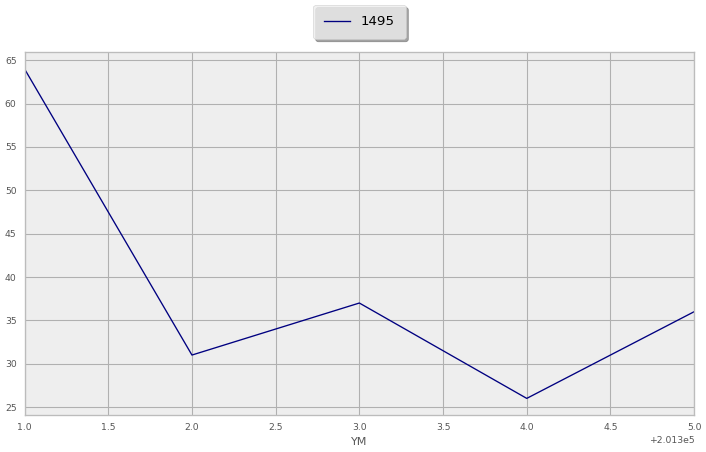

In [88]:
high_chart=sales_per_item_PM[sales_per_item_PM.item_id.isin(high.item_id) ].head()
pix.display(high_chart)

In [ ]:
#export the PM dataset and then see how constant the high and low values are - are there trends?
#could do as an explore here with plot lib...

In [18]:
#this is an example you want to replicate, to find the data in the often sold from the general volume data
df[~df.countries.isin(countries)]
df1 = pd.DataFrame({'c': ['A', 'A', 'B', 'C', 'C'],
                    'k': [1, 2, 2, 2, 2],
                    'l': ['a', 'b', 'a', 'a', 'd']})
df2 = pd.DataFrame({'c': ['A', 'C'],
                    'l': ['b', 'a']})
keys = list(df2.columns.values)
i1 = df1.set_index(keys).index
i2 = df2.set_index(keys).index
df1[~i1.isin(i2)]

,c,k,l
0,A,1,a
2,B,2,a
4,C,2,d


In [19]:
df1

,c,k,l
0,A,1,a
1,A,2,b
2,B,2,a
3,C,2,a
4,C,2,d


In [20]:
df2

,c,l
0,A,b
1,C,a


In [21]:
i1

MultiIndex(levels=[['A', 'B', 'C'], ['a', 'b', 'd']],
           labels=[[0, 0, 1, 2, 2], [0, 1, 0, 0, 2]],
           names=['c', 'l'])